In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('Ads_CTR_Optimisation.csv')

In [4]:
N = 10000 #總用戶數
d = 10    #總廣告數
numbers_of_selections = [0] * d #對於每一個廣告，其被投放的總次數，初始化為0
sums_of_rewards = [0] * d #對於每個廣告，其得到的獎勵數(點擊數)，初始化為0
ads_selected = []
total_reward = 0

In [8]:
for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if numbers_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2)*math.log(n+1) / numbers_of_selections[i]
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad) #每輪最終投放的廣告
    reward = data.values[n,ad]
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward
    
#前十個用戶投放前10個廣告，即第一個用戶投放第一個廣告、第二個用戶投放第二個廣告、...、第10個用戶投放第10個廣告
#計算出每個用戶的upper_bound後，每次都選擇最大upper_bound的廣告進行投射

Text(0,0.5,'Number of times each ad was selected')

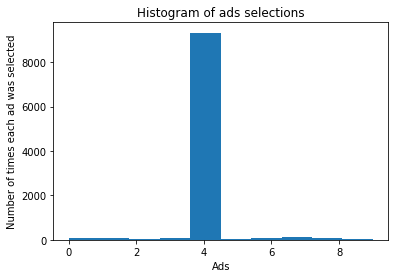

In [9]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
#Ad5被投放最多次，代表投放Ad5會獲得最多的點擊率